<h1>EDA project 3</h1>

I start bij manually inspecting the data I've been given.
Here I notice some outliers like:
-   black and white images
-   duplicates
-   extra stuff on the image like: arrows, a wasp etc.
-   a rot apple in the normal section
-   a painting of an apple very far away

I decided to put these images in a different folder called outliers, I did this for the train AND the test files. I can experiment with these outliers later, but for now I want a basic working model to start with.

<h3>Now lets start by installing the libraries</h3>

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
import matplotlib.pyplot as plt
import os
import math

<h3>Create path's</h3>

In [3]:
# Create path's
blotch_directory = "../informatie/apple_disease_classification/images/Train/Blotch_Apple/" 
normal_directory = "../informatie/apple_disease_classification/images/Train/Normal_Apple/" 
rot_directory = "../informatie/apple_disease_classification/images/Train/Rot_Apple/" 
scab_directory = "../informatie/apple_disease_classification/images/Train/Scab_Apple/" 

<h3>Namechange + create lists</h3>

In [4]:
# I namechange my files. I also put the filepaths in a list.
blotch_files = list()
normal_files = list()
rot_files = list()
scab_files = list()

# First for blotch
counter = 0 
for filename in os.listdir(blotch_directory):
    imgFile = os.path.join(blotch_directory, filename)

    if ".jpg" in imgFile:
        counter += 1
        # I COMMENTED THIS OUT BECAUSE IF RUN AGAIN IT GIVES AN ERROR SINCE THE NAME ALREADY EXISTS
        # os.rename(imgFile, f"{blotch_directory}/blotch_{counter}.jpg")
        blotch_files.append(imgFile)

# Second for normal
counter = 0
for filename in os.listdir(normal_directory):
    imgFile = os.path.join(normal_directory, filename)

    if ".jpg" in imgFile:
        counter += 1
        # I COMMENTED THIS OUT BECAUSE IF RUN AGAIN IT GIVES AN ERROR BECAUSE THE NAME ALREADY EXISTS
        # os.rename(imgFile, f"{normal_directory}/normal_{counter}.jpg")
        normal_files.append(imgFile)

# Third for rot
counter = 0
for filename in os.listdir(rot_directory):
    imgFile = os.path.join(rot_directory, filename)

    if ".jpg" in imgFile:
        counter += 1
        # I COMMENTED THIS OUT BECAUSE IF RUN AGAIN IT GIVES AN ERROR BECAUSE THE NAME ALREADY EXISTS
        # os.rename(imgFile, f"{rot_directory}/rot_{counter}.jpg")
        rot_files.append(imgFile)

# Fourth for scab
counter = 0
for filename in os.listdir(scab_directory):
    imgFile = os.path.join(scab_directory, filename)

    if ".jpg" in imgFile:
        counter += 1
        # I COMMENTED THIS OUT BECAUSE IF RUN AGAIN IT GIVES AN ERROR BECAUSE THE NAME ALREADY EXISTS
        # os.rename(imgFile, f"{scab_directory}/scab_{counter}.jpg")
        scab_files.append(imgFile)



In [5]:
# Doublechecking.
print(blotch_files)
print(normal_files)
print(rot_files)
print(scab_files)

['../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_1.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_10.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_100.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_101.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_102.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_103.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_104.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_105.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_106.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_107.jpg', '../informatie/apple_disease_classification/images/Train/Blotch_Apple/blotch_108.jpg', '../informatie/apple_disease_classification/i

<h3>Load images</h3>

In [6]:
# Gather data
blotch_data = list()
normal_data = list()
rot_data = list()
scab_data = list()

for b in blotch_files:
    blotch_data.append(torchvision.io.read_image(b, ImageReadMode.UNCHANGED))
for n in normal_files:
    normal_data.append(torchvision.io.read_image(n, ImageReadMode.UNCHANGED))
for r in rot_files:
    rot_data.append(torchvision.io.read_image(r, ImageReadMode.UNCHANGED))
for s in scab_files:
    scab_data.append(torchvision.io.read_image(s, ImageReadMode.UNCHANGED))

print(F"Blotch images: {len(blotch_data)}")
print(f"Normal images: {len(normal_data)}")
print(f"Rot images: {len(rot_data)}")
print(f"Scab images: {len(scab_data)}")

Blotch images: 102
Normal images: 61
Rot images: 113
Scab images: 78


<h3>Plot images</3>

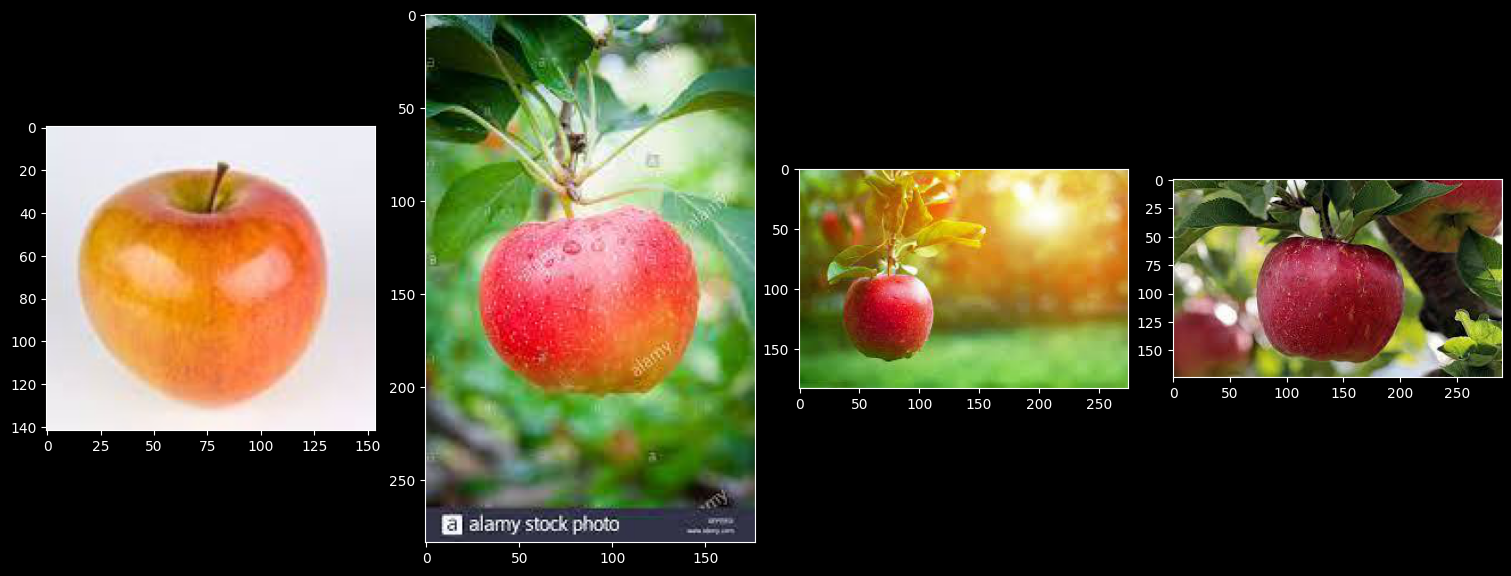

In [27]:
# Create a plot-function
def plotImgs(img1,img2,img3,img4):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (15, 10)

    fig, (axL, axL2, axR, axR2) = plt.subplots(ncols=4, constrained_layout=True)
    
    imL = axL.imshow(img1.permute(1,2,0))
    imR = axL2.imshow(img2.permute(1,2,0))
    im3 = axR.imshow(img3.permute(1,2,0))
    im4 = axR2.imshow(img4.permute(1,2,0))

plotImgs(normal_data[0],normal_data[1],normal_data[2],normal_data[3])

<h3>Resize images to the same size</h3>

In [7]:
# Resize everything to the same size
# Resize images
resize = T.Resize((128,128))

for i in range(len(normal_data)):
    normal_data[i] = resize(normal_data[i])
for i in range(len(blotch_data)):
    blotch_data[i] = resize(blotch_data[i])
for i in range(len(rot_data)):
    rot_data[i] = resize(rot_data[i])
for i in range(len(scab_data)):
    scab_data[i] = resize(scab_data[i])

print(normal_data[3].shape)
print(blotch_data[3].shape)
print(rot_data[3].shape)
print(scab_data[3].shape)



torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


<h2>Now I save the images and check manually if they look OK, if not I remove them.</h2>

In [14]:
# Save path's
good_apples = "../informatie/apple_disease_classification/images/Train/Dataset/normal_apples/"
blotch_apples = "../informatie/apple_disease_classification/images/Train/Dataset/blotch_apples/"
rot_apples = "../informatie/apple_disease_classification/images/Train/Dataset/rot_apples/"
scab_apples = "../informatie/apple_disease_classification/images/Train/Dataset/scab_apples/"


In [15]:
# Save images
# for i in range(len(normal_data)):
#     torchvision.io.write_jpeg(normal_data[i],filename=f"{good_apples}good_apple{i}.jpg")

for i in range(len(blotch_data)):
    torchvision.io.write_jpeg(blotch_data[i],filename=f"{blotch_apples}blotch_apple{i}.jpg")

for i in range(len(rot_data)):
    torchvision.io.write_jpeg(rot_data[i],filename=f"{rot_apples}rot_apple{i}.jpg")

for i in range(len(scab_data)):
    torchvision.io.write_jpeg(scab_data[i],filename=f"{scab_apples}scab_apple{i}.jpg")

<h3>Next I want to flip and rotate the images so that I have more to work with</h3> 

I will do this in my pipeline.